# Data Science Projet : House Prices: Advanced Regression Techniques

## Mohamed Karim Abid - second year SISY

This project is devided to three main parts
    <br>1.Exploring the data
    <br>2.Preprocessing the data and features engineering
    <br>3.PCA
    <br>4.Linear regression
<br><br>The first part was an exploration of the data, the different features and the relations between the features and the variable to predict, also the missing values in the data.
<br><br>In the second part, i prepared the dat for linear regression by removing some variables, replacing missing variables, enlabeling and creating dummies for categorical features
<br><br>In the third part i used PCA giving that our data contains some highly correlated features with the Sale Price, and also the fact that there are many features
<br><br>In the last part i used the linear regression in order to predict the prices of the houses 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

Importing data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Exploring the data

This part is dedicating to visualizing the data mainly the sale price and the relation between the features

> The trainnig data has 1460 row and 81 columns, the testing data has 1459 rows and 80 colomn.
<br>The first column is the Id column.
->The data is described by 79 features.

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

A look at the train and data sets

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Exploring te features.

Looking at the different features :

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

> There are numerical features and categorical features ( having objecct as a type)

#### A description of the data features:

    SalePrice - the property's sale price in dollars. This is the target variable taht we have to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


> The features described different aspects and characteristics of the house : area, different parts of te house its  utilities, its location .. etc


#### Exploring the target variable SalePrice

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Sale Price')

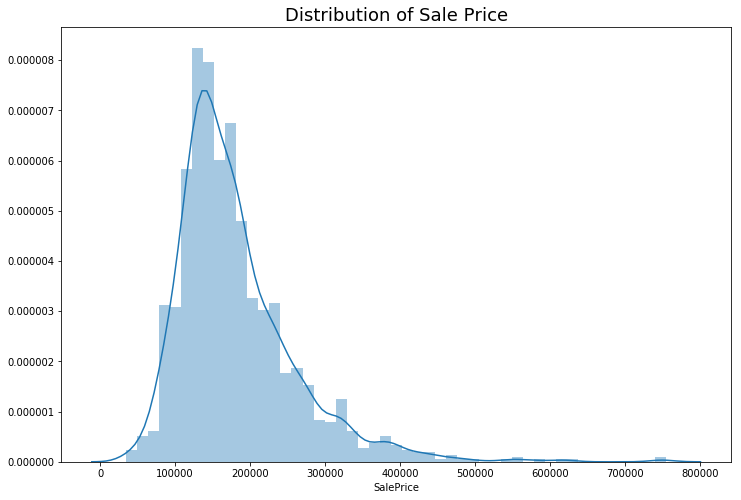

In [8]:
plt.figure(figsize = (12,8))
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price', fontsize = 18)

In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

> Most of the houses prices lays between 100000 and 250000 wich also notice from the first and third quatiles :
<br> 25%  =    129975.000000
<br> 75%  =    214000.000000

#### Finding the most correlated variables in the data

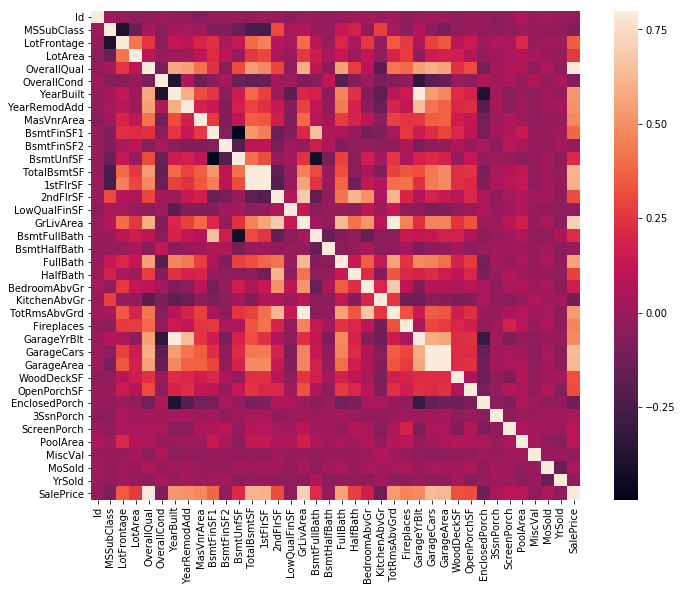

In [10]:
corrmat = train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax =0.8, square = True)

> **Comment** :
We can see that there are variables so correlated with Sale Price as the Over all quality, Ground living area, Total Basement area .. ect, that makes sense in fact the price of the house depends so much on the its area and its qulity. And it also depends on other variables.
<br> We can see there are a significant correlation between other variables in the data i.e. YearBuilt and GrgYearBuilt as they represent approximately the same variable. Also the Garage variables and Total basement area. 

We zoom the heatmap to see the most correlates variables with Sale Price.

<Figure size 720x648 with 0 Axes>

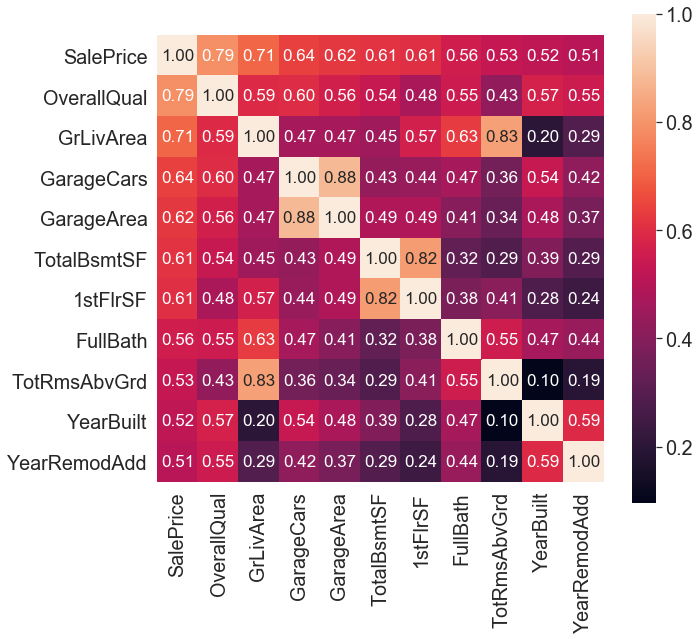

In [11]:
k = 11 #number of variables
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.8)
plt.figure(figsize = (10,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 17}, yticklabels=cols.values, xticklabels=cols.values)

> We can see that the most correlated variables with Sale Price are : OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd.
<br> There are variables that gives the same informations as Garage Area and Garage cars as the number of cars that can fit into the garage can telll us about its area. The same for Total basement area and 1stFloor.

We plot Scatter plots between 'SalePrice' and numerical correlated variables to observe the relation.

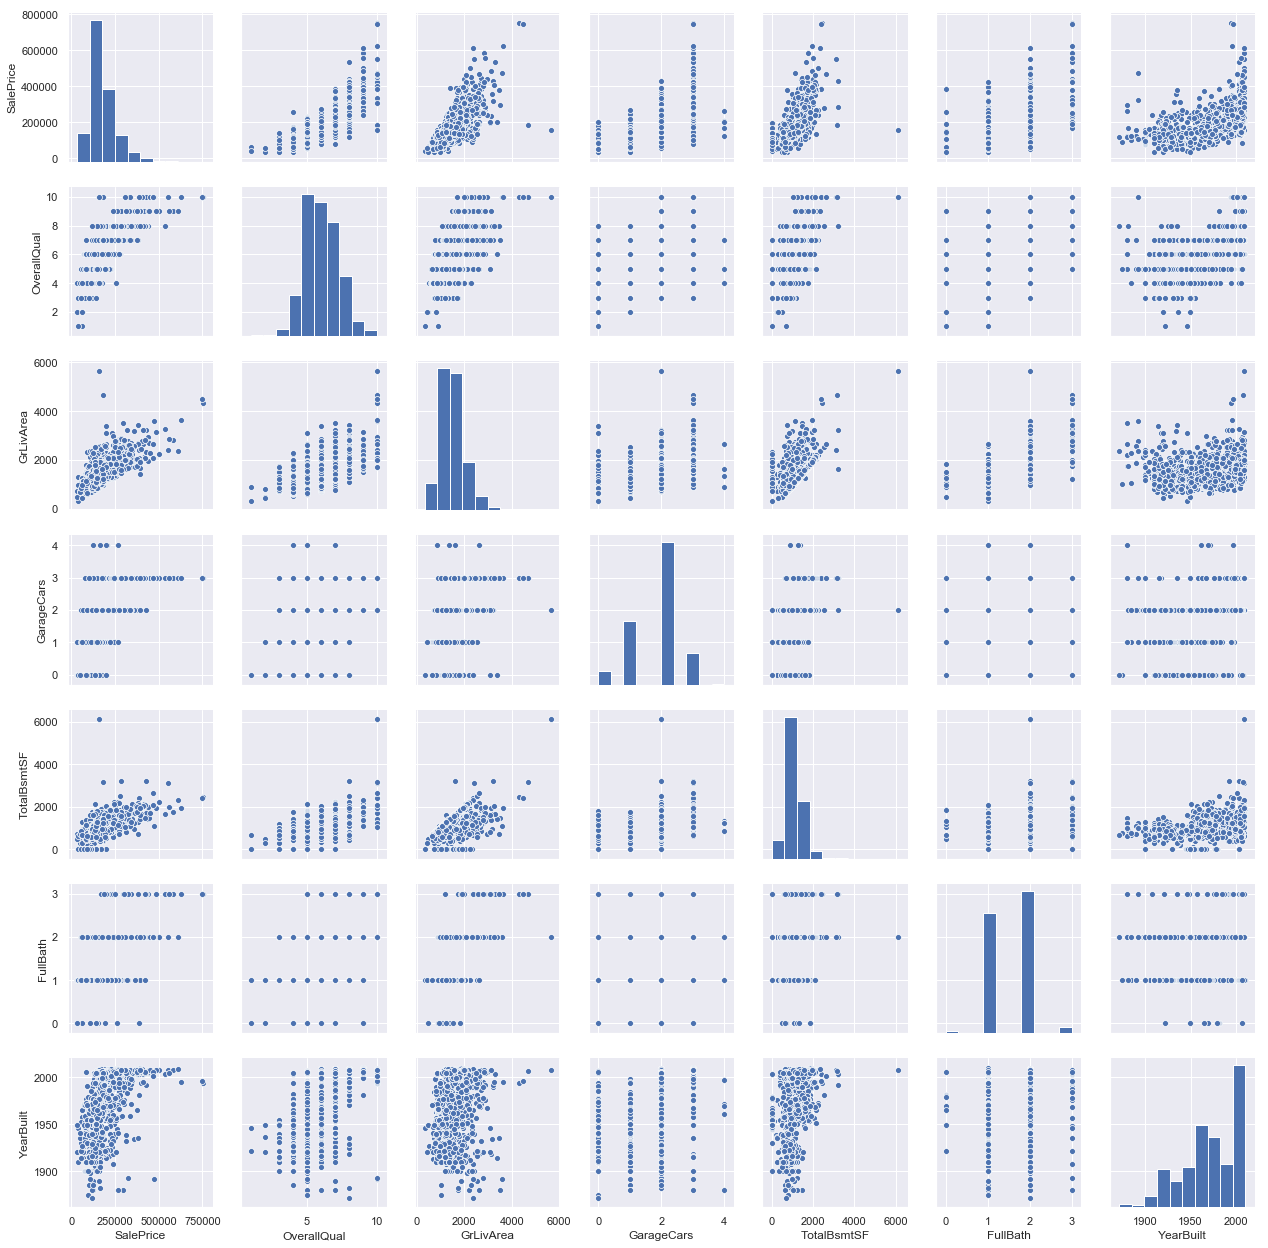

In [12]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
#sns.set(font_scale = 1.8)

> To see the relationship between Sale Price and its highly correlated variables, i plot the scatter plot with the numerical features

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


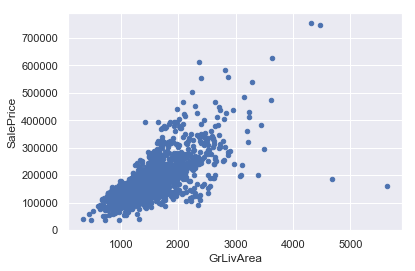

In [13]:
xy = pd.concat([train['SalePrice'],train['GrLivArea']], axis = 1)
xy.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

>  We can see a linear relation between these two variables, when the ground living area increases, the price increases, which makes sense.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


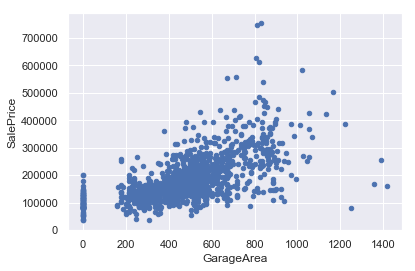

In [14]:
xy = pd.concat([train['SalePrice'],train['GarageArea']], axis = 1)
xy.plot.scatter(x = 'GarageArea', y = 'SalePrice')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


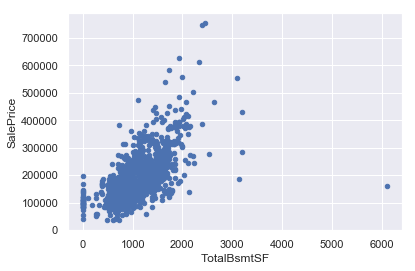

In [15]:
xy = pd.concat([train['SalePrice'],train['TotalBsmtSF']], axis = 1)
xy.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice')

> For these variable we notice a linear relation also.

For categorical features, we observe the boxplots.

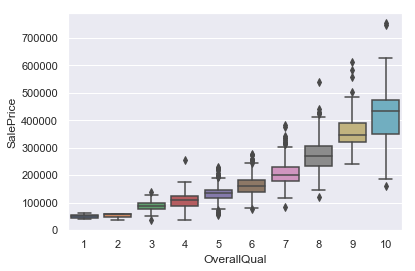

In [16]:
xy = pd.concat([train['SalePrice'],train['OverallQual']], axis = 1)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = xy)

> we observe a linar relationship between the house price and its quality, wich is reasonable.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

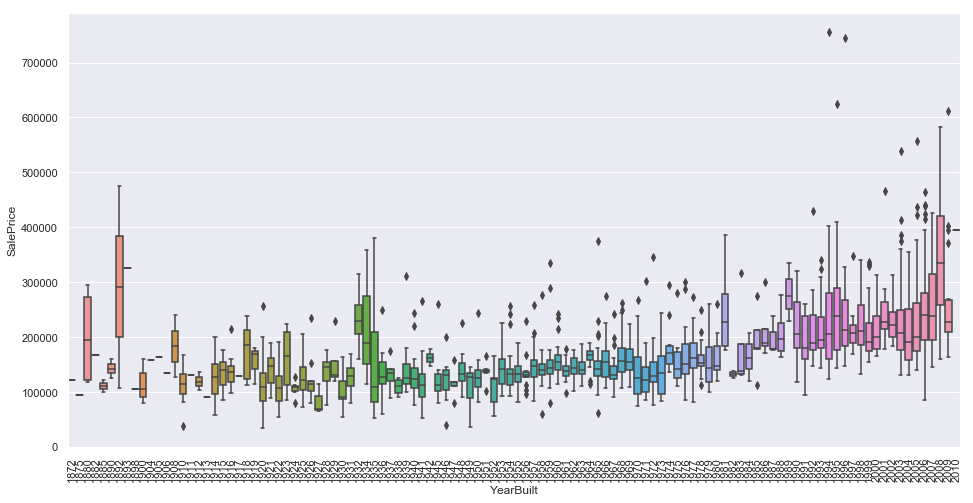

In [17]:
xy = pd.concat([train['SalePrice'],train['YearBuilt']], axis = 1)
f, ax = plt.subplots(figsize = (16,8))
f = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = xy)
plt.xticks(rotation = 90)

> The relation ist's not really linear but seems to. In the last years we see a growing relationship.

## Preprocessing the data and features engineering

#### Removing Outliers

> Outliers tend to deviate the linear model, so we remove them
<br> to dermine them i plotted th scatter of SalePrice and GrLivArea, since the area is one of the important indicator of a house price

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


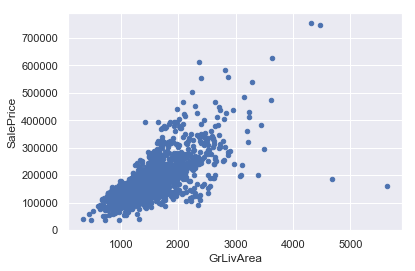

In [18]:
xy = pd.concat([train['SalePrice'],train['GrLivArea']], axis = 1)
xy.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

> There are two examples with high area and low price, these are outliers (we see those outliers almso in the SalePrice distribution)
<br> those outliers have price lower than 25000 and area greater than 400000

In [19]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Visualizing our data after removing them

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


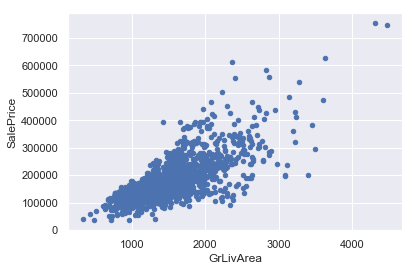

In [20]:
xy = pd.concat([train['SalePrice'],train['GrLivArea']], axis = 1)
xy.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

#### Missing Data

i notice that there is missing data. i am going to analyse these missing values, determine its percentage and replace it.

In [21]:
train_na = (train.isnull().sum() / len(train))*100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':train_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
FireplaceQu,47.325103
LotFrontage,17.764060
GarageYrBlt,5.555556
GarageType,5.555556
GarageFinish,5.555556
GarageQual,5.555556


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 1.0, 'Percent missing data by feature')

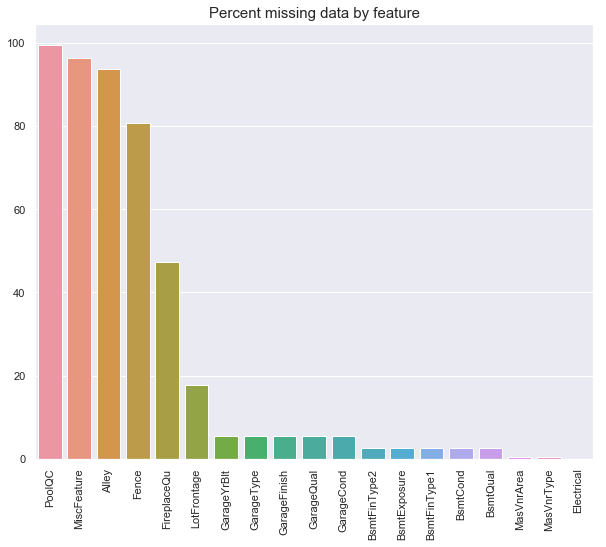

In [22]:
f, ax = plt.subplots(figsize = (10,8))
plt.xticks(rotation = '90')
sns.barplot(x = train_na.index, y = train_na)
plt.title('Percent missing data by feature', fontsize=15)

>i am going to apply modifications to the data, so i concatenate the test and train data since i will apply the same modifications.
<br> But first , i remove the Id column since it doesn't add any informations.

> i concatenated the train and test set, since i will apply the same transformations

In [23]:
train.drop(['Id'], axis=1, inplace=True)
test_id = test['Id']
test.drop(['Id'], axis=1, inplace=True)

In [24]:
# the Sale Price column
y = train['SalePrice'].reset_index(drop=True)
# removing the SalePrice in order to cancatenate the train and test sets
train_1 = train.drop(['SalePrice'], axis=1)
test_1 = test
data = pd.concat([train_1, test_1]).reset_index(drop=True)
data.shape

(2917, 79)

>Most of the categorical features are strings, but there are numerical ones, so first i transform them to strings. THose variables are { 'MSSubClass', 'YrSold', 'MoSold', 'OverallCond'}

In [25]:
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['YrSold'] = data['YrSold'].apply(str)
data['MoSold'] = data['MoSold'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)

>I'm going to handle missing data
<br>First, in the data there are categorical features and numerical features.

In [26]:
caterigocalCols = data.select_dtypes('object').columns
print(caterigocalCols)
print('The number of categorical features is', len(caterigocalCols))


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')
The number of categorical features is 47


>There are variables which NaN means that the variable doesn't exist for that house, and so it's related variables, which is the case of Garage and Basement, so we replace them by 'None' for categorical features, and 0 for numerical features.
<br>The categorical ones are 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
<br>And the numerical ones are 'GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1','TotalBsmtSF'.

In [27]:
caterigocalColsNone = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in caterigocalColsNone:
    data[col] = data[col].fillna('None')
    
caterigocalColsMode = ['Functional','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType']
for col in caterigocalColsMode:
    frq = data[col].mode()[0]
    data[col].fillna(value=frq,inplace=True)

#Idea is that similar MSSubClasses will have similar MSZoning , same for LotFrontage and Neighberood
data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

numericalColsZero = ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1','TotalBsmtSF']
for col in numericalColsZero:
    data[col] = data[col].fillna(0)
    


i fill the remaining columns with None

In [28]:
data.update(data[caterigocalCols].fillna('None'))

For numeical features i fill NaN in the other numeric features by 0

In [29]:
numericalCols = []
for i in data.columns:
    if data[i].dtype != 'object':
        numericalCols.append(i)


In [30]:
print(numericalCols)
print('The number of numerical features is', len(caterigocalCols))


['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
The number of numerical features is 47


In [31]:
data.update(data[numericalCols].fillna(0))


#### Transforming categorical features

Since we can't train the linear modal by the least residual error using categorical features, i transformed them in two ways, i transformed te majority to dummies, and some of them to labels using the labelEncoder since the significance of their order is important like th year and month

#### Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    lbl = LabelEncoder() ;
    lbl.fit(list(data[col].values)) ;
    data[col] = lbl.transform(list(data[col].values));


LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

#### Transforming caterigocal features to dummy variables


In [33]:
data_2 = pd.get_dummies(data).reset_index(drop = True)
data_2.shape

(2917, 222)

In [34]:
train_2 = data_2.iloc[:len(y),:]
test_2 = data_2.iloc[len(y):,:]
train_2.shape, test_2.shape, y.shape

((1458, 222), (1459, 222), (1458,))

>Since i added dummies and replaced NaN in numerical features by 0, there could be variables that have a high percentage of 0 values, so i will find them and remove them, i fixed this percentage to be greater that 99.96


In [35]:
zerosCols = []
for col in train_2.columns:
    counts = train_2[col].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train_2) * 100 > 99.96:
        zerosCols.append(col)

zerosCols = list(zerosCols)
train_2 = train_2.drop(zerosCols, axis=1)
test_2 = test_2.drop(zerosCols, axis=1)
zerosCols

['Utilities_None']

## PCA

As seen in the corrmat, as there are many features highly correlated with SalePrice, i'm going to use PCA in order to decorrelate the features and keep the ones that keep the most ratio of variance (information) .

>First, i am going to plot the variance ration as a function of the number of components, in order to choose the suitable number

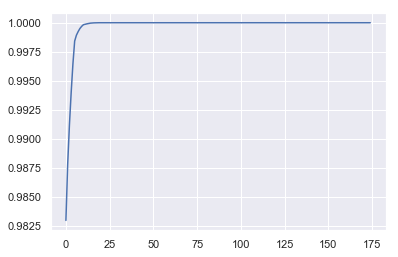

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=175)
train_3 = train_2
test_3 = test_2
train_3=pca.fit_transform(train_3)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

> Second, i scaled the data to have better results using pca.

In [37]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [38]:
train_2 = scaler.fit(train_2).transform(train_2)
test_2 = scaler.transform(test_2)

> i've chosen 175 components, since, as we see in the next graph, the number of components to keep a high ratio of variance is about 25,also to keep more informations and since that number tend to have the least score as i tried ather numbers

In [39]:
pca = PCA(n_components=175)
train_2=pca.fit_transform(train_2)
test_2 = pca.transform(test_2)


## Linear Regression

> Last, after preprocessing our data, using pca, i am going to use the linear regression

In [40]:
LR = LinearRegression()

In [41]:
LR.fit(train_2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
out = LR.predict(test_2)

> The predicted prices

In [48]:
sub = pd.DataFrame()
sub['SalePrice'] = out
sub.to_csv('submission.csv',index=False)

> To visualize the result, i plotted th graph of the predictions in function of the Ground Living Area

In [44]:
sub['GrLivArea'] = test['GrLivArea']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


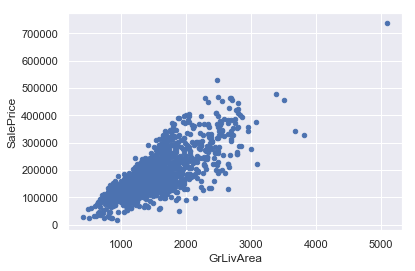

In [45]:
sub.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

> The graph is similar of train's, we see the linar relationship

To conclude, i used different data science technics in order to predict the houses price giving many features, mainly linear regression and PCA.
<br>Submitting my solution in Kaggle, i got score of 0.17211.